# Task 1: Initial Exploration & Cleaning

• Load and explore the dataset using Pandas.
• Check for missing values, data types, and unique values in each column.
• Clean any inconsistencies, such as missing dates or negative values where they shouldn't be.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\aush\Desktop\data analyst techzone\Assigments\final\construction_project_progress_data.csv")
#Loading the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProjectID           100 non-null    int64  
 1   ProjectName         100 non-null    object 
 2   Stage               100 non-null    object 
 3   Substage            100 non-null    object 
 4   StartDate           100 non-null    object 
 5   PlannedEndDate      100 non-null    object 
 6   ActualEndDate       71 non-null     object 
 7   ProgressPercentage  100 non-null    float64
 8   BudgetAllocated     100 non-null    int64  
 9   BudgetUtilized      100 non-null    float64
 10  TeamAssigned        100 non-null    object 
 11  RiskLevel           100 non-null    object 
 12  IssuesReported      100 non-null    int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 10.3+ KB


In [5]:
df.isnull().sum()
#checking missing data

ProjectID              0
ProjectName            0
Stage                  0
Substage               0
StartDate              0
PlannedEndDate         0
ActualEndDate         29
ProgressPercentage     0
BudgetAllocated        0
BudgetUtilized         0
TeamAssigned           0
RiskLevel              0
IssuesReported         0
dtype: int64

In [6]:
df.nunique()
#checking number of unique values

ProjectID              69
ProjectName             4
Stage                   3
Substage                9
StartDate              88
PlannedEndDate         87
ActualEndDate          65
ProgressPercentage     99
BudgetAllocated       100
BudgetUtilized        100
TeamAssigned            5
RiskLevel               3
IssuesReported         11
dtype: int64

In [7]:
# Display unique values in each column
for column in df.columns:
    print(f"In {column} columns unique values are:\n {df[column].unique()}\n")

In ProjectID columns unique values are:
 [1037 1052 1025 1049 1085 1013 1048 1028 1056 1002 1047 1021 1079 1064
 1082 1055 1051 1026 1020 1065 1038 1066 1100 1042 1072 1045 1070 1046
 1089 1003 1081 1095 1069 1088 1043 1090 1087 1027 1040 1004 1076 1060
 1031 1083 1015 1010 1019 1014 1061 1036 1057 1009 1050 1017 1033 1074
 1084 1063 1062 1000 1096 1067 1039 1008 1053 1068 1098 1034 1029]

In ProjectName columns unique values are:
 ['Mall Development' 'Office Tower' 'Bridge Development'
 'Residential Complex']

In Stage columns unique values are:
 ['Construction' 'Engineering' 'Procurement']

In Substage columns unique values are:
 ['Final Assembly' 'Site Survey' 'Foundation Laying' 'Material Sourcing'
 'Vendor Selection' 'Site Preparation' 'Logistics Planning'
 'Structural Design' 'Design Approval']

In StartDate columns unique values are:
 ['2023-04-08' '2023-04-24' '2023-05-25' '2023-10-23' '2023-03-28'
 '2023-10-07' '2023-10-17' '2023-08-10' '2023-01-14' '2023-12-07'
 '2023-02-01' 

In [8]:
# Handeling missing values
df['ActualEndDate'].fillna(df['PlannedEndDate'], inplace=True)
df.isnull().sum()

ProjectID             0
ProjectName           0
Stage                 0
Substage              0
StartDate             0
PlannedEndDate        0
ActualEndDate         0
ProgressPercentage    0
BudgetAllocated       0
BudgetUtilized        0
TeamAssigned          0
RiskLevel             0
IssuesReported        0
dtype: int64

# Task 2: Calculating Budget Efficiency
• Objective: Evaluate budget efficiency across projects.
• Instructions:
o Calculate a budget efficiency ratio: [BudgetUtilized/BudgetAllocated]
o Identify projects that exceeded their budget.
o Analyze if specific project types tend to have higher budget utilization.

In [9]:
df['BudgetEfficiency'] = df['BudgetUtilized'] / df['BudgetAllocated']

In [10]:
df.head()

,ProjectID,ProjectName,Stage,Substage,StartDate,PlannedEndDate,ActualEndDate,ProgressPercentage,BudgetAllocated,BudgetUtilized,TeamAssigned,RiskLevel,IssuesReported,BudgetEfficiency
0,1037,Mall Development,Construction,Final Assembly,2023-04-08,2023-07-06,2023-06-30,41.96,174906,73389.33,Team Beta,Medium,8,0.419593
1,1052,Office Tower,Engineering,Site Survey,2023-04-24,2023-07-18,2023-07-17,89.04,496017,441638.86,Team Gamma,Low,6,0.890370
2,1025,Bridge Development,Construction,Foundation Laying,2023-05-25,2023-07-01,2023-07-01,70.61,354007,249973.69,Team Omega,Medium,7,0.706126
3,1049,Bridge Development,Procurement,Material Sourcing,2023-10-23,2023-12-01,2023-11-23,88.92,449110,399357.07,Team Beta,Medium,4,0.889219
4,1085,Office Tower,Procurement,Vendor Selection,2023-03-28,2023-05-14,2023-05-05,99.21,346679,343930.43,Team Beta,Medium,4,0.992072


In [11]:
def show_projects(df):
    # Find projects with Budget Efficiency greater than 1
    high_efficiency_projects = df[df["BudgetEfficiency"] > 1]
    
    if not high_efficiency_projects.empty:
        print("Projects with Budget Efficiency greater than 1:")
        print(high_efficiency_projects["ProjectID"].to_string(index=False))
    else:
        print("No projects exceed their budget")

# Run the function to display project IDs
show_projects(df)

No projects exceed their budget


In [12]:
df['PlannedEndDate'] = pd.to_datetime(df['PlannedEndDate'])
df['ActualEndDate'] = pd.to_datetime(df['ActualEndDate'])
df['Delays'] = (df['ActualEndDate'] - df['PlannedEndDate']).dt.days

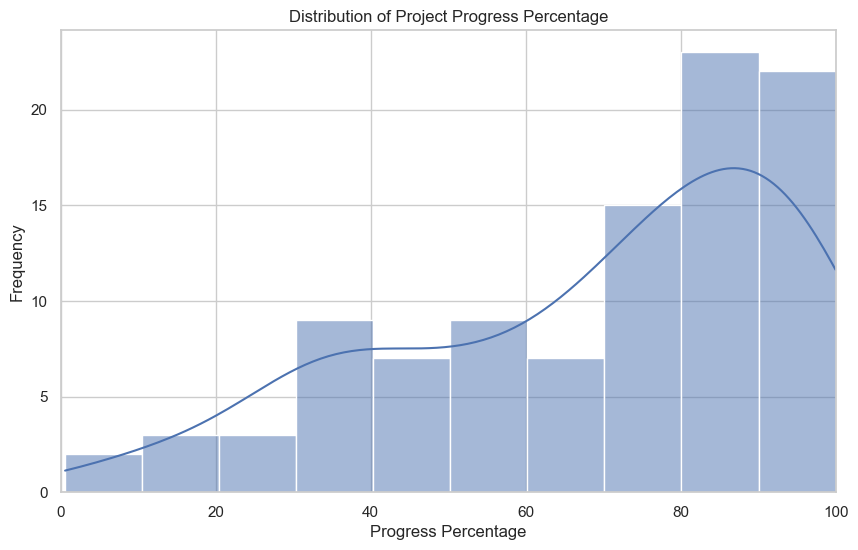

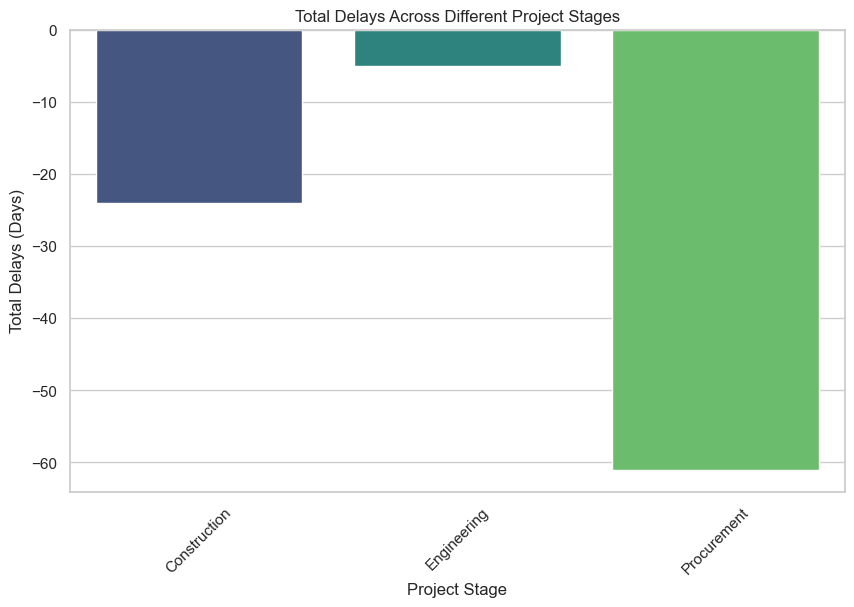

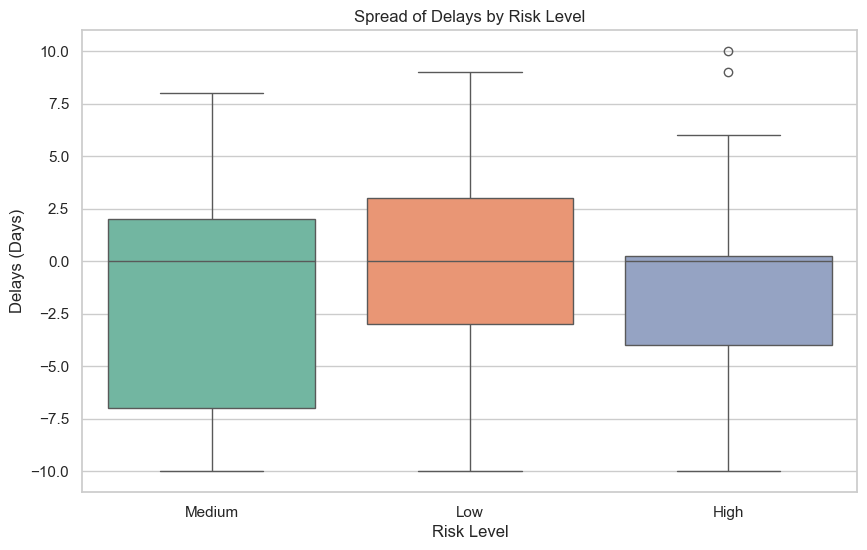

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn

sns.set(style="whitegrid")

# 1. Histogram for ProgressPercentage
plt.figure(figsize=(10, 6))
sns.histplot(df['ProgressPercentage'], bins=10, kde=True)
plt.title('Distribution of Project Progress Percentage')
plt.xlabel('Progress Percentage')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

# 2. Bar Chart comparing Delays across different project stages
plt.figure(figsize=(10, 6))
stage_delays = df.groupby('Stage')['Delays'].sum().reset_index()
sns.barplot(x='Stage', y='Delays', data=stage_delays, palette='viridis')
plt.title('Total Delays Across Different Project Stages')
plt.xlabel('Project Stage')
plt.ylabel('Total Delays (Days)')
plt.xticks(rotation=45)
plt.show()

# 3. Box Plot to understand the spread of delays by RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='Delays', data=df, palette='Set2')
plt.title('Spread of Delays by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Delays (Days)')
plt.show()


In [14]:
df

,ProjectID,ProjectName,Stage,Substage,StartDate,PlannedEndDate,ActualEndDate,ProgressPercentage,BudgetAllocated,BudgetUtilized,TeamAssigned,RiskLevel,IssuesReported,BudgetEfficiency,Delays
0,1037,Mall Development,Construction,Final Assembly,2023-04-08,2023-07-06,2023-06-30,41.96,174906,73389.33,Team Beta,Medium,8,0.419593,-6
1,1052,Office Tower,Engineering,Site Survey,2023-04-24,2023-07-18,2023-07-17,89.04,496017,441638.86,Team Gamma,Low,6,0.890370,-1
2,1025,Bridge Development,Construction,Foundation Laying,2023-05-25,2023-07-01,2023-07-01,70.61,354007,249973.69,Team Omega,Medium,7,0.706126,0
3,1049,Bridge Development,Procurement,Material Sourcing,2023-10-23,2023-12-01,2023-11-23,88.92,449110,399357.07,Team Beta,Medium,4,0.889219,-8
4,1085,Office Tower,Procurement,Vendor Selection,2023-03-28,2023-05-14,2023-05-05,99.21,346679,343930.43,Team Beta,Medium,4,0.992072,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1029,Office Tower,Procurement,Vendor Selection,2023-07-28,2023-10-06,2023-10-08,51.14,164182,83964.92,Team Delta,Low,0,0.511414,2
96,1060,Bridge Development,Construction,Final Assembly,2023-07-04,2023-08-26,2023-08-26,0.56,414014,2323.84,Team Alpha,High,8,0.005613,0
97,1050,Bridge Development,Procurement,Logistics Planning,2023-02-15,2023-05-03,2023-05-03,71.22,304552,216903.71,Team Delta,Medium,2,0.712206,0
98,1040,Office Tower,Engineering,Site Survey,2023-05-03,2023-07-18,2023-07-18,84.97,221813,188480.74,Team Gamma,Medium,5,0.849728,0


In [15]:
print(df.describe())

        ProjectID       PlannedEndDate        ActualEndDate  \
count   100.00000                  100                  100   
mean   1051.07000  2023-09-05 08:09:36  2023-09-04 10:33:36   
min    1000.00000  2023-02-14 00:00:00  2023-02-14 00:00:00   
25%    1028.75000  2023-06-18 12:00:00  2023-06-17 00:00:00   
50%    1050.50000  2023-09-07 00:00:00  2023-09-04 12:00:00   
75%    1072.50000  2023-11-25 12:00:00  2023-11-20 18:00:00   
max    1100.00000  2024-03-04 00:00:00  2024-03-05 00:00:00   
std      27.53226                  NaN                  NaN   

       ProgressPercentage  BudgetAllocated  BudgetUtilized  IssuesReported  \
count          100.000000       100.000000      100.000000      100.000000   
mean            68.880200    302295.670000   213635.655400        4.960000   
min              0.560000    102021.000000     2323.840000        0.000000   
25%             51.740000    213635.500000   117550.377500        3.000000   
50%             75.435000    296502.000000

In [20]:
grouped_mean_budget_utilized = df.groupby('RiskLevel')['BudgetUtilized'].mean().round()
print(grouped_mean_budget_utilized)

RiskLevel
High      200589.0
Low       220541.0
Medium    221497.0
Name: BudgetUtilized, dtype: float64


In [19]:
grouped_mean_budget_allocated = df.groupby('RiskLevel')['BudgetAllocated'].mean().round()
print(grouped_mean_budget_allocated)

RiskLevel
High      292196.0
Low       304484.0
Medium    312192.0
Name: BudgetAllocated, dtype: float64


In [21]:
from scipy import stats
high_risk = df[df['RiskLevel'] == 'High']
low_risk = df[df['RiskLevel'] == 'Low']

In [23]:
# T-test for BudgetAllocated
t_stat_allocated, p_value_allocated = stats.ttest_ind(
    high_risk['BudgetAllocated'], 
    low_risk['BudgetAllocated'], 
    equal_var=False  # Welch's t-test for unequal variance
)

# T-test for BudgetUtilized
t_stat_utilized, p_value_utilized = stats.ttest_ind(
    high_risk['BudgetUtilized'], 
    low_risk['BudgetUtilized'], 
    equal_var=False  # Welch's t-test for unequal variance
)

# Print the results
print("T-test for BudgetAllocated:")
print("T-statistic:", t_stat_allocated)
print("P-value:", p_value_allocated)

print("\nT-test for BudgetUtilized:")
print("T-statistic:", t_stat_utilized)
print("P-value:", p_value_utilized)


T-test for BudgetAllocated:
T-statistic: -0.4371385523418501
P-value: 0.6634528310359855

T-test for BudgetUtilized:
T-statistic: -0.6932053413098939
P-value: 0.4906225580839958


In [24]:
# Calculate variance in BudgetUtilized for both risk levels
variance_high_utilized = high_risk['BudgetUtilized'].var()
variance_low_utilized = low_risk['BudgetUtilized'].var()

print("\nVariance in BudgetUtilized:")
print("High Risk Projects:", variance_high_utilized)
print("Low Risk Projects:", variance_low_utilized)

# Comment on variance comparison
if variance_high_utilized > variance_low_utilized:
    print("\nHigh-risk projects tend to have a larger variance in budget utilization.")
else:
    print("\nHigh-risk projects do not show a larger variance in budget utilization compared to low-risk projects.")



Variance in BudgetUtilized:
High Risk Projects: 11808142466.537628
Low Risk Projects: 17514715432.793842

High-risk projects do not show a larger variance in budget utilization compared to low-risk projects.


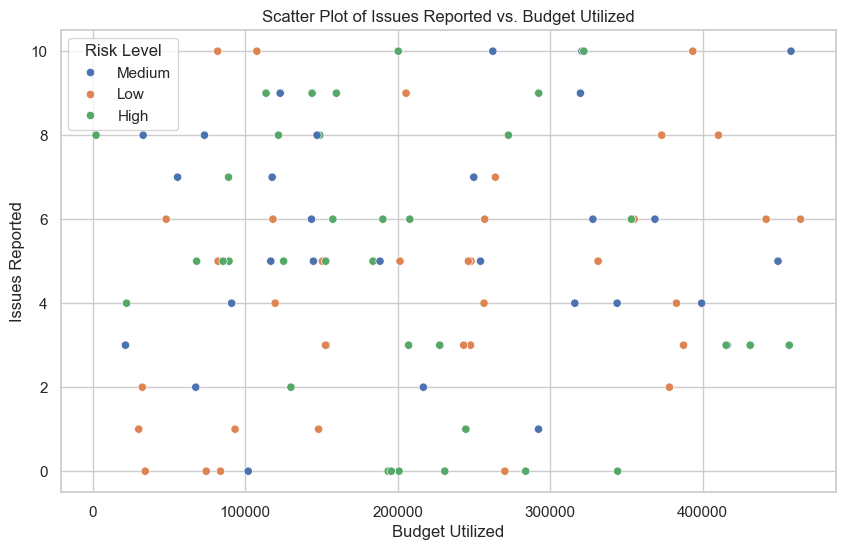

In [25]:
# Scatter plot of IssuesReported vs. BudgetUtilized colored by RiskLevel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BudgetUtilized', y='IssuesReported', hue='RiskLevel', palette='deep')
plt.title('Scatter Plot of Issues Reported vs. Budget Utilized')
plt.xlabel('Budget Utilized')
plt.ylabel('Issues Reported')
plt.legend(title='Risk Level')
plt.show()


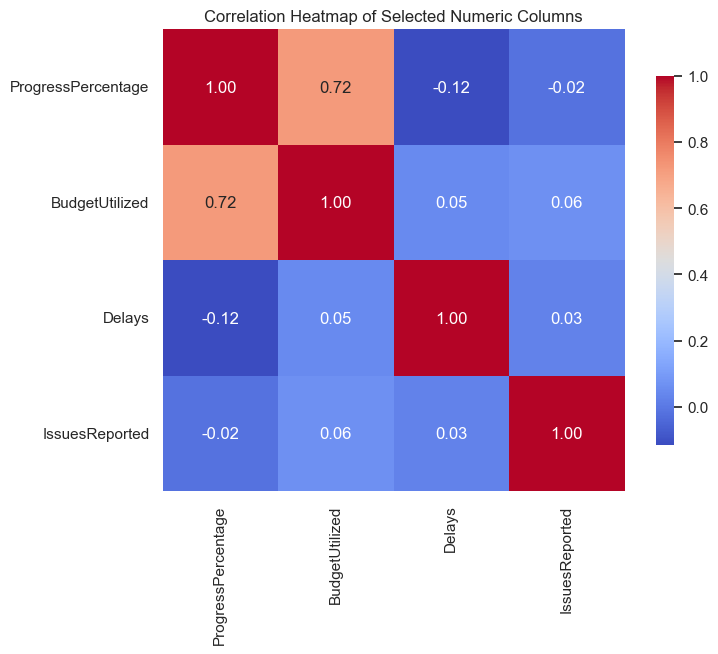

In [37]:
# Selecting relevant numeric columns
correlation_data = df[['ProgressPercentage', 'BudgetUtilized', 'Delays', 'IssuesReported']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Heatmap to show correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.show()



In [30]:
# Calculate the mean ProgressPercentage for projects in each Stage
mean_progress = df.groupby('Stage')['ProgressPercentage'].mean().reset_index()

# Determine the top 3 stages with the highest average ProgressPercentage
top_stages = mean_progress.nlargest(3, 'ProgressPercentage')
print("Top 3 Stages with Highest Average Progress Percentage:")
print(top_stages)

Top 3 Stages with Highest Average Progress Percentage:
          Stage  ProgressPercentage
1   Engineering           89.041515
2   Procurement           76.707500
0  Construction           42.714571


In [34]:
# Create the Status column based on the Delays column
df['Status'] = df['Delays'].apply(lambda x: 'On Track' if x <= 0 else 'Delayed')


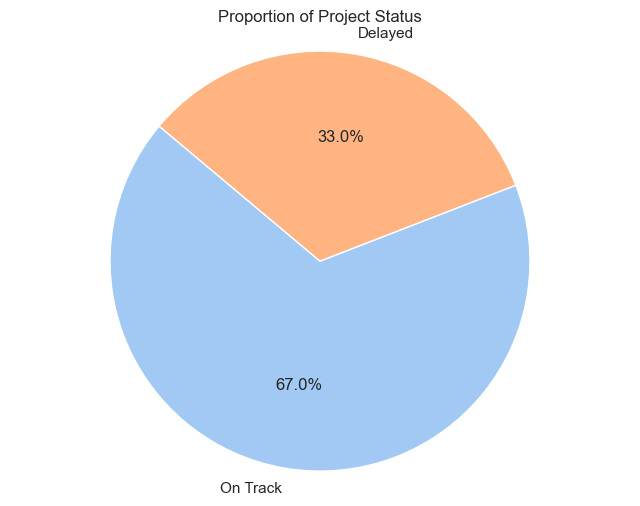

In [35]:
# Count the number of occurrences of each Status
status_counts = df['Status'].value_counts()

# Create a pie chart to show the proportion of Status across projects
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Proportion of Project Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


In [38]:
print(correlation_matrix)

                    ProgressPercentage  BudgetUtilized    Delays  \
ProgressPercentage            1.000000        0.719734 -0.115474   
BudgetUtilized                0.719734        1.000000  0.045906   
Delays                       -0.115474        0.045906  1.000000   
IssuesReported               -0.017698        0.063523  0.025956   

                    IssuesReported  
ProgressPercentage       -0.017698  
BudgetUtilized            0.063523  
Delays                    0.025956  
IssuesReported            1.000000  
